데이터주무르기 5장. /전국/카토그램cartogram  
책과다른 데이터로 어떻게든 해보려고 했으나..OTZ
## 인구 소별 위기 지역 분석

In [92]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### 5-2 데이터 확보하고 정리하기

In [94]:
population = pd.read_csv('./data/성별, 연령별 인구 - 시군구(2019).csv', encoding='euc-kr')
population.head()

,광역시도,시군구,행정구,구분,합계,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,서울,소계,NaN,계,9096901,983091,402343,548245,768413,687804,...,677660,782455,731258,728273,664875,465250,370242,280007,163363,96792
1,서울,소계,NaN,남자,4386287,505543,201751,233761,377349,341858,...,335606,385491,354886,349208,313417,218378,170303,126711,66754,30757
2,서울,소계,NaN,여자,4710614,477548,200592,314484,391064,345946,...,342054,396964,376372,379065,351458,246872,199939,153296,96609,66035
3,서울,종로구,NaN,계,136649,12204,5801,9816,11972,9459,...,9034,11784,11462,11781,10125,7057,5960,5277,3341,2065
4,서울,종로구,NaN,남자,65594,6183,2803,4230,6167,4747,...,4341,5709,5511,5773,5021,3369,2659,2290,1387,747


In [53]:
#컬럼'시군구'의 '소계'행 삭제
delsum = population[population['시군구'] == '소계'].index
pop = population.drop(delsum)

In [54]:
pop.columns

Index(['광역시도', '시군구', '행정구', '구분', '합계', '15세미만', '15~19세', '20~24세', '25~29세',
       '30~34세', '35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세',
       '65~69세', '70~74세', '75~79세', '80~84세', '85세이상'],
      dtype='object')

### 5-3 인구 소멸 위기지역 계산하고 데이터정리하기

In [55]:
pop['20~39세'] = pop['20~24세'] + pop['25~29세'] + pop['30~34세'] + pop['35~39세']

In [56]:
pop['65세이상'] = pop['65~69세'] + pop['70~74세'] + pop['75~79세'] + pop['80~84세'] + pop['85세이상']

In [154]:
 #population.fillna('', inplace=True)

In [50]:
# population['시군행정구'] = population[['시군구', '행정구']].apply(''.join, axis=1) #이걸썼더니 시군행정구 개판 ㅋㅋ
#if population['행정구']==nan ? 그대로두고 : '시군구'+'행정구' #삼항식쓰고싶지만
for n in population.index:
    if population['행정구'].isnull()[n] == False:
        population['시군구'][n] = population['행정구'][n][1:]


In [57]:
pop.head()

,광역시도,시군구,행정구,구분,합계,15세미만,15~19세,20~24세,25~29세,30~34세,...,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,20~39세,65세이상
3,서울,종로구,NaN,계,136649,12204,5801,9816,11972,9459,...,11462,11781,10125,7057,5960,5277,3341,2065,40758,23700
4,서울,종로구,NaN,남자,65594,6183,2803,4230,6167,4747,...,5511,5773,5021,3369,2659,2290,1387,747,19801,10452
5,서울,종로구,NaN,여자,71055,6021,2998,5586,5805,4712,...,5951,6008,5104,3688,3301,2987,1954,1318,20957,13248
6,서울,중구,NaN,계,115665,9839,3896,7511,10304,9636,...,9313,9786,9002,6211,5077,4201,2581,1695,37325,19765
7,서울,중구,NaN,남자,55820,4988,1896,3103,5115,4790,...,4587,4830,4430,2998,2295,1795,1003,523,17998,8614


In [58]:
#컬럼명변경
pop.rename(columns={'합계':'인구수'}, inplace=True)

In [59]:
#마법의 키워드!!  필요한것만 쏙쏙ㅋㅋ
pop2 = pd.pivot_table(pop, index=['광역시도','시군구'], columns=['구분'], values=['인구수','20~39세','65세이상'])
pop2

20~39세                      65세이상                         인구수  \
구분               계       남자       여자        계       남자       여자         계   
광역시도 시군구                                                                    
강원    강릉시  46008.0  25015.0  20993.0  40497.0  17378.0  23119.0  203057.0   
      고성군   4006.0   2307.0   1699.0   7005.0   2957.0   4048.0   23621.0   
      동해시  16311.0   8801.0   7510.0  16152.0   7075.0   9077.0   83888.0   
      삼척시  12428.0   7148.0   5280.0  14953.0   6314.0   8639.0   61833.0   
      속초시  15928.0   8517.0   7411.0  14010.0   5866.0   8144.0   76302.0   
...            ...      ...      ...      ...      ...      ...       ...   
충북    제천시  26688.0  14204.0  12484.0  26116.0  11618.0  14498.0  126666.0   
      증평군   9059.0   4972.0   4087.0   5720.0   2460.0   3260.0   35464.0   
      진천군  18978.0  10355.0   8623.0  12143.0   5177.0   6966.0   76197.0   
      청주시  90443.2  47213.6  43229.6  40118.8  17367.2  22751.6  321009.6   
      충주시  47183.0  25700.0  21483.0  37574.0  16091.0  21483.0  201057.0   

                               
구분               남자        여자  
광역시도 시군구                       
강원    강릉시  101154.0  101903.0  
      고성군   11933.0   11688.0  
      동해시   42093.0   41795.0  
      삼척시   31630.0   30203.0  
      속초시   37488.0   38814.0  
...             ...       ...  
충북    제천시   63363.0   63303.0  
      증평군   18166.0   17298.0  
      진천군   39378.0   36819.0  
      청주시  160360.8  160648.8  
      충주시  101311.0   99746.0  

[229 rows x 9 columns]

In [60]:
#소멸비율컬럼추가 = 가임기여성/(65세이상/2)
pop2['소멸비율'] = pop2['20~39세','여자'] / (pop2['65세이상','계'] / 2)
pop2.head()

20~39세                      65세이상                         인구수  \
구분               계       남자       여자        계       남자       여자         계   
광역시도 시군구                                                                    
강원    강릉시  46008.0  25015.0  20993.0  40497.0  17378.0  23119.0  203057.0   
      고성군   4006.0   2307.0   1699.0   7005.0   2957.0   4048.0   23621.0   
      동해시  16311.0   8801.0   7510.0  16152.0   7075.0   9077.0   83888.0   
      삼척시  12428.0   7148.0   5280.0  14953.0   6314.0   8639.0   61833.0   
      속초시  15928.0   8517.0   7411.0  14010.0   5866.0   8144.0   76302.0   

                                   소멸비율  
구분               남자        여자            
광역시도 시군구                                 
강원    강릉시  101154.0  101903.0  1.036768  
      고성군   11933.0   11688.0  0.485082  
      동해시   42093.0   41795.0  0.929916  
      삼척시   31630.0   30203.0  0.706213  
      속초시   37488.0   38814.0  1.057959

In [61]:
# 소멸비율이 1미만이면 '소멸위기지역'으로 구분
pop2['소멸위기지역'] = pop2['소멸비율'] < 1.0
pop2.head()

20~39세                      65세이상                         인구수  \
구분               계       남자       여자        계       남자       여자         계   
광역시도 시군구                                                                    
강원    강릉시  46008.0  25015.0  20993.0  40497.0  17378.0  23119.0  203057.0   
      고성군   4006.0   2307.0   1699.0   7005.0   2957.0   4048.0   23621.0   
      동해시  16311.0   8801.0   7510.0  16152.0   7075.0   9077.0   83888.0   
      삼척시  12428.0   7148.0   5280.0  14953.0   6314.0   8639.0   61833.0   
      속초시  15928.0   8517.0   7411.0  14010.0   5866.0   8144.0   76302.0   

                                   소멸비율 소멸위기지역  
구분               남자        여자                   
광역시도 시군구                                        
강원    강릉시  101154.0  101903.0  1.036768  False  
      고성군   11933.0   11688.0  0.485082   True  
      동해시   42093.0   41795.0  0.929916   True  
      삼척시   31630.0   30203.0  0.706213   True  
      속초시   37488.0   38814.0  1.057959  False

In [62]:
#해당지역의 리스트 뽑기
pop2[pop2['소멸위기지역']==True].index.get_level_values(1)

Index([' 고성군', ' 동해시', ' 삼척시', ' 양구군', ' 양양군', ' 영월군', ' 인제군', ' 정선군', ' 철원군',
       ' 태백시', ' 평창군', ' 홍천군', ' 화천군', ' 횡성군', ' 가평군', ' 양평군', ' 여주시', ' 연천군',
       ' 거창군', ' 고성군', ' 남해군', ' 밀양시', ' 사천시', ' 산청군', ' 의령군', ' 창녕군', ' 하동군',
       ' 함안군', ' 함양군', ' 합천군', ' 경주시', ' 고령군', ' 군위군', ' 김천시', ' 문경시', ' 봉화군',
       ' 상주시', ' 성주군', ' 안동시', ' 영덕군', ' 영양군', ' 영주시', ' 영천시', ' 예천군', ' 울릉군',
       ' 울진군', ' 의성군', ' 청도군', ' 청송군', ' 동구', ' 영도구', ' 중구', ' 강화군', ' 옹진군',
       ' 강진군', ' 고흥군', ' 곡성군', ' 구례군', ' 담양군', ' 보성군', ' 신안군', ' 영광군', ' 영암군',
       ' 완도군', ' 장성군', ' 장흥군', ' 진도군', ' 함평군', ' 해남군', ' 화순군', ' 고창군', ' 김제시',
       ' 남원시', ' 무주군', ' 부안군', ' 순창군', ' 완주군', ' 임실군', ' 장수군', ' 정읍시', ' 진안군',
       ' 공주시', ' 금산군', ' 논산시', ' 보령시', ' 부여군', ' 서천군', ' 예산군', ' 청양군', ' 태안군',
       ' 홍성군', ' 괴산군', ' 단양군', ' 보은군', ' 영동군', ' 옥천군', ' 제천시'],
      dtype='object', name='시군구')

In [63]:
#지도로 시각화 하기 위한 리셋인덱스
pop2.reset_index(inplace=True)
pop2.head()

광역시도   시군구   20~39세                      65세이상                         인구수  \
구분                   계       남자       여자        계       남자       여자         계   
0    강원   강릉시  46008.0  25015.0  20993.0  40497.0  17378.0  23119.0  203057.0   
1    강원   고성군   4006.0   2307.0   1699.0   7005.0   2957.0   4048.0   23621.0   
2    강원   동해시  16311.0   8801.0   7510.0  16152.0   7075.0   9077.0   83888.0   
3    강원   삼척시  12428.0   7148.0   5280.0  14953.0   6314.0   8639.0   61833.0   
4    강원   속초시  15928.0   8517.0   7411.0  14010.0   5866.0   8144.0   76302.0   

                            소멸비율 소멸위기지역  
구분        남자        여자                   
0   101154.0  101903.0  1.036768  False  
1    11933.0   11688.0  0.485082   True  
2    42093.0   41795.0  0.929916   True  
3    31630.0   30203.0  0.706213   True  
4    37488.0   38814.0  1.057959  False

In [64]:
#pivot_table에 의해 다단으로 구성된 index초기화 (컬럼하나로 합침)
tmp_coloumns = [pop2.columns.get_level_values(0)[n] + pop2.columns.get_level_values(1)[n]
                for n in range(0, len(pop2.columns.get_level_values(0)))]
pop2.columns = tmp_coloumns
pop2.head()

,광역시도,시군구,20~39세계,20~39세남자,20~39세여자,65세이상계,65세이상남자,65세이상여자,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역
0,강원,강릉시,46008.0,25015.0,20993.0,40497.0,17378.0,23119.0,203057.0,101154.0,101903.0,1.036768,False
1,강원,고성군,4006.0,2307.0,1699.0,7005.0,2957.0,4048.0,23621.0,11933.0,11688.0,0.485082,True
2,강원,동해시,16311.0,8801.0,7510.0,16152.0,7075.0,9077.0,83888.0,42093.0,41795.0,0.929916,True
3,강원,삼척시,12428.0,7148.0,5280.0,14953.0,6314.0,8639.0,61833.0,31630.0,30203.0,0.706213,True
4,강원,속초시,15928.0,8517.0,7411.0,14010.0,5866.0,8144.0,76302.0,37488.0,38814.0,1.057959,False


In [65]:
pop2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      229 non-null    object 
 1   시군구       229 non-null    object 
 2   20~39세계   229 non-null    float64
 3   20~39세남자  229 non-null    float64
 4   20~39세여자  229 non-null    float64
 5   65세이상계    229 non-null    float64
 6   65세이상남자   229 non-null    float64
 7   65세이상여자   229 non-null    float64
 8   인구수계      229 non-null    float64
 9   인구수남자     229 non-null    float64
 10  인구수여자     229 non-null    float64
 11  소멸비율      229 non-null    float64
 12  소멸위기지역    229 non-null    bool   
dtypes: bool(1), float64(10), object(2)
memory usage: 21.8+ KB


### 5-4,5 지도 시각화를 위해 지역별 고유ID만들기

In [66]:
pop2['시군구'].unique()

array([' 강릉시', ' 고성군', ' 동해시', ' 삼척시', ' 속초시', ' 양구군', ' 양양군', ' 영월군',
       ' 원주시', ' 인제군', ' 정선군', ' 철원군', ' 춘천시', ' 태백시', ' 평창군', ' 홍천군',
       ' 화천군', ' 횡성군', ' 가평군', ' 고양시', ' 과천시', ' 광명시', ' 광주시', ' 구리시',
       ' 군포시', ' 김포시', ' 남양주시', ' 동두천시', ' 부천시', ' 성남시', ' 수원시', ' 시흥시',
       ' 안산시', ' 안성시', ' 안양시', ' 양주시', ' 양평군', ' 여주시', ' 연천군', ' 오산시',
       ' 용인시', ' 의왕시', ' 의정부시', ' 이천시', ' 파주시', ' 평택시', ' 포천시', ' 하남시',
       ' 화성시', ' 거제시', ' 거창군', ' 김해시', ' 남해군', ' 밀양시', ' 사천시', ' 산청군',
       ' 양산시', ' 의령군', ' 진주시', ' 창녕군', ' 창원시', ' 통영시', ' 하동군', ' 함안군',
       ' 함양군', ' 합천군', ' 경산시', ' 경주시', ' 고령군', ' 구미시', ' 군위군', ' 김천시',
       ' 문경시', ' 봉화군', ' 상주시', ' 성주군', ' 안동시', ' 영덕군', ' 영양군', ' 영주시',
       ' 영천시', ' 예천군', ' 울릉군', ' 울진군', ' 의성군', ' 청도군', ' 청송군', ' 칠곡군',
       ' 포항시', ' 광산구', ' 남구', ' 동구', ' 북구', ' 서구', ' 달서구', ' 달성군', ' 수성구',
       ' 중구', ' 대덕구', ' 유성구', ' 강서구', ' 금정구', ' 기장군', ' 동래구', ' 부산진구',
       ' 사상구', ' 사하구', ' 수영구', ' 연제구', ' 영도구', ' 해운대구', ' 강남구', ' 강동구'

In [67]:
pop2['광역시도'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [68]:
si_name = [None] * len(pop2)
tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'],
                '성남':['수정구','중원구','분당구'],
                '안양':['만안구','동안구'],
                '안산':['상록구','단원구'],
                '고양':['덕양구','일산동구','일산서구'],
                '용인':['처인구', '기흥구', '수지구'],
                '청주':['상당구','서원구','흥덕구','청원구'],
                '천안':['동남구','서북구'],
                '전주':['완산구','덕진구'],
                '포항':['남구', '북구'],
                '창원':['의창구','성산구','진해구','마산합포구','마산회원구']}

In [69]:
#자치구의 이름이 같은 경우가 많음/ 단, 고성군은 강원도와 경남 두군데 있음
for n in pop2.index:
    if pop2['광역시도'][n][-3:] not in ['광역시','특별시','자치시']:
        if pop2['시군구'][n][:-1]=='고성' and pop2['광역시도'][n]=='강원도':
            si_name[n] = '고성(강원)'
        elif pop2['시군구'][n][:-1]=='고성' and pop2['광역시도'][n]=='경상남도':
            si_name[n] = '고성(경남)'
        else:
            si_name[n] = pop2['시군구'][n][:-1]

        for keys, values in tmp_gu_dict.items():
            if pop2['시군구'][n] in values:
                if len(pop2['시군구'][n])==2:
                    si_name[n] = keys + ' ' + pop2['시군구'][n]
                elif pop2['시군구'][n] in ['마산합포구', '마산회원구']:
                    si_name[n] = keys + ' ' + pop2['시군구'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + pop2['시군구'][n][:-1]

    elif pop2['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
    else:
        if len(pop2['시군구'][n])==2:
            si_name[n] = pop2['광역시도'][n][:2] + '' + pop2['시군구'][n]
        else:
            si_name[n] = pop2['광역시도'][n][:2] + '' + pop2['시군구'][n][:-1]

In [70]:
si_name

[' 강릉',
 ' 고성',
 ' 동해',
 ' 삼척',
 ' 속초',
 ' 양구',
 ' 양양',
 ' 영월',
 ' 원주',
 ' 인제',
 ' 정선',
 ' 철원',
 ' 춘천',
 ' 태백',
 ' 평창',
 ' 홍천',
 ' 화천',
 ' 횡성',
 ' 가평',
 ' 고양',
 ' 과천',
 ' 광명',
 ' 광주',
 ' 구리',
 ' 군포',
 ' 김포',
 ' 남양주',
 ' 동두천',
 ' 부천',
 ' 성남',
 ' 수원',
 ' 시흥',
 ' 안산',
 ' 안성',
 ' 안양',
 ' 양주',
 ' 양평',
 ' 여주',
 ' 연천',
 ' 오산',
 ' 용인',
 ' 의왕',
 ' 의정부',
 ' 이천',
 ' 파주',
 ' 평택',
 ' 포천',
 ' 하남',
 ' 화성',
 ' 거제',
 ' 거창',
 ' 고성',
 ' 김해',
 ' 남해',
 ' 밀양',
 ' 사천',
 ' 산청',
 ' 양산',
 ' 의령',
 ' 진주',
 ' 창녕',
 ' 창원',
 ' 통영',
 ' 하동',
 ' 함안',
 ' 함양',
 ' 합천',
 ' 경산',
 ' 경주',
 ' 고령',
 ' 구미',
 ' 군위',
 ' 김천',
 ' 문경',
 ' 봉화',
 ' 상주',
 ' 성주',
 ' 안동',
 ' 영덕',
 ' 영양',
 ' 영주',
 ' 영천',
 ' 예천',
 ' 울릉',
 ' 울진',
 ' 의성',
 ' 청도',
 ' 청송',
 ' 칠곡',
 ' 포항',
 ' 광산',
 ' 남',
 ' 동',
 ' 북',
 ' 서',
 ' 남',
 ' 달서',
 ' 달성',
 ' 동',
 ' 북',
 ' 서',
 ' 수성',
 ' 중',
 ' 대덕',
 ' 동',
 ' 서',
 ' 유성',
 ' 중',
 ' 강서',
 ' 금정',
 ' 기장',
 ' 남',
 ' 동',
 ' 동래',
 ' 부산진',
 ' 북',
 ' 사상',
 ' 사하',
 ' 서',
 ' 수영',
 ' 연제',
 ' 영도',
 ' 중',
 ' 해운대',
 ' 강남',
 ' 강동',
 ' 강

In [71]:
pop2['ID'] = si_name

In [72]:
del pop2['20~39세남자']
del pop2['65세이상남자']
del pop2['65세이상여자']
pop2.head()

,광역시도,시군구,20~39세계,20~39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,ID
0,강원,강릉시,46008.0,20993.0,40497.0,203057.0,101154.0,101903.0,1.036768,False,강릉
1,강원,고성군,4006.0,1699.0,7005.0,23621.0,11933.0,11688.0,0.485082,True,고성
2,강원,동해시,16311.0,7510.0,16152.0,83888.0,42093.0,41795.0,0.929916,True,동해
3,강원,삼척시,12428.0,5280.0,14953.0,61833.0,31630.0,30203.0,0.706213,True,삼척
4,강원,속초시,15928.0,7411.0,14010.0,76302.0,37488.0,38814.0,1.057959,False,속초


In [73]:
draw_korea_raw = pd.read_excel('./data/draw_korea_raw(수정).xlsx', encoding="euc-kr")
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,NaN,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,과천,성남 중원,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 미추홀,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [74]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'},inplace=True)
draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


In [75]:
#변수이름변경
draw_korea = draw_korea_raw_stacked

In [86]:
# 광역시도를 구분하는 경계선
BORDER_LINES = [
    [(5,1), (5,2), (6,2), (6,3), (11,3), (11,0)], #인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], #서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), (12,7), (12,6), (11,6), (11,5), (12,5), (12,4), (11,4), (11,3)], #경기도
    [(8,10), (8,11), (6,11), (6,12)], #강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), (15,4), (16,4), (16,2)], #충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], #전라북도
    [(13,5), (13,6), (16,6)], #대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)],#충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,10), (16,13)], #울산
    [(27,5), (27,6), (25,6)],
]

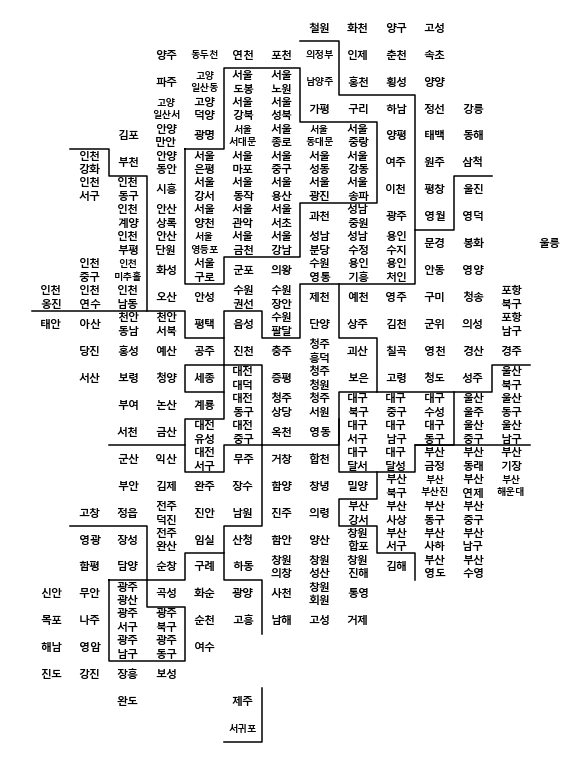

In [87]:
plt.figure(figsize=(8,11))

#지역이름표시
for idx, row in draw_korea.iterrows():
    #광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시 (중구,서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    #서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2
    
    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', fontsize=fontsize, ha='center', va='center', linespacing=linespacing)

#시도 경계 그리기
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis() #y출이 엑셀에서 0번이 시작하는 것과 matplotlib가 0이라고 인식하는 좌표가 서로 반대이기 때문에
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [90]:
tmp_list = list(set(pop2['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    pop2 = pop2.drop(pop2[pop2['ID']==tmp].index)

print(set(pop2['ID'].unique()) - set(draw_korea['ID'].unique()))
set()

set()


set()

In [91]:
pop2 = pd.merge(pop2, draw_korea, how='left', on=['ID'])
pop2.head()

,광역시도,시군구,20~39세계,20~39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,y,x,ID
